In [1]:
import sys
sys.path.append('./../backend/flask_api/code/src/')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from ml_utils import get_metrics
from pandoras_box import create_predictor, get_prediction

from IPython.display import display

/home/lucas/.virtualenvs/fds/local/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
def print_full(x, n=None, m=None):
    """
    Print a full pandas object.

    Args:
        x: dataframe or series
        n: max rows to show
        m: max columns to show
    """

    shape = x.shape
    pd.set_option('display.max_rows', n or shape[0])
    if (len(shape) > 1):
        pd.set_option('display.max_columns', m or shape[1])

    display(x)
    pd.reset_option('display.max_rows')
    pd.reset_option('display.max_columns')

# Dataset selection

In [3]:
# Dataset
b1 = 'WA_Fn-UseC_-HR-Employee-Attrition_train.csv'
b2 = 'WA_Fn-UseC_-HR-Employee-Attrition_test.csv'

file_name = b1

Let us have a first look at the dataset...

In [10]:
print_full(pd.read_csv('./../backend/flask_api/code/etc/data/' + file_name), n=6)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.0,No,Travel_Rarely,548,Research & Development,9,4,Life Sciences,1,1772,3,Male,94,3,1,Laboratory Technician,1,Divorced,2289,20520,1,Y,No,20,4,2,80,2,5,2,3,5.0,3,0,4
1,45.0,No,Travel_Rarely,1234,Sales,11,2,Life Sciences,1,1045,4,Female,90,3,4,Manager,4,Married,17650,5404,3,Y,No,13,3,2,80,1,26,4,4,9.0,3,1,1
2,36.0,No,Travel_Rarely,711,Research & Development,5,4,Life Sciences,1,1651,2,Female,42,3,3,Healthcare Representative,1,Married,8008,22792,4,Y,No,12,3,3,80,2,9,6,3,3.0,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1320,50.0,No,Travel_Rarely,328,Research & Development,1,3,Medical,1,249,3,Male,86,2,1,Laboratory Technician,3,Married,3690,3425,2,Y,No,15,3,4,80,1,5,2,2,3.0,2,0,2
1321,39.0,No,Travel_Rarely,722,Sales,24,1,Marketing,1,2056,2,Female,60,2,4,Sales Executive,4,Married,12031,8828,0,Y,No,11,3,1,80,1,21,2,2,20.0,9,9,6
1322,26.0,No,Travel_Frequently,496,Research & Development,11,2,Medical,1,390,1,Male,60,3,2,Healthcare Representative,1,Married,4741,22722,1,Y,Yes,13,3,3,80,1,5,3,3,5.0,3,3,3


# Feature mapping
## b) WA_Fn-UseC_-HR-Employee-Attrition mapping

In [11]:
# IDs
employee_id = 'EmployeeNumber'
record_id = None

# Dates
hire_date = None
record_date = None
termination_date = None

length_of_service = 'YearsAtCompany'

# Age / birthday
age = 'Age'
birth_date = None
birth_year = None

# Target
target = 'Attrition'
other_target_fields = []

# Others
job_title = 'JobRole'

# Special field types
special_field_types = {}

# Pandora's Box

## Create predictor

In [15]:
selected_feats, woe_dicts, clf, scaler, valid_metrics, plot_dict = create_predictor(
    './../backend/flask_api/code/etc/data/' + file_name, target,
    employee_id=employee_id,
    record_id=record_id,
    hire_date=hire_date,
    record_date=record_date,
    termination_date=termination_date,
    length_of_service=length_of_service,
    age=age,
    birth_date=birth_date,
    birth_year=birth_year,
    other_target_fields=other_target_fields,
    job_title=job_title,
    special_field_types=special_field_types)

In [16]:
valid_metrics

{'accuracy': 0.8867924528301887,
 'log_loss': 0.3114581230740596,
 'roc_auc': 0.812042842215256}

49
49


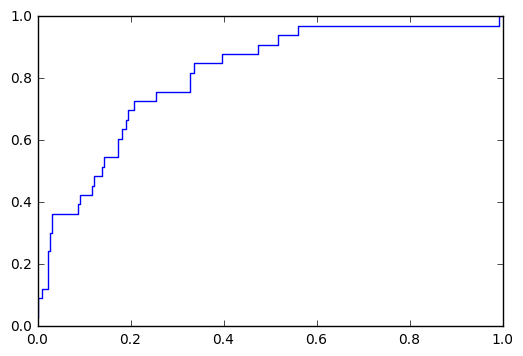

In [17]:
fpr = plot_dict['results'][0]['val']
tpr = plot_dict['results'][1]['val']

print len(fpr)
print len(tpr)

plt.plot(fpr, tpr)
plt.show() 

## Get prediction

In [19]:
score, result = get_prediction(
    './' + b2, selected_feats, woe_dicts, clf, scaler,
    employee_id=employee_id,
    record_id=record_id,
    hire_date=hire_date,
    record_date=record_date,
    termination_date=termination_date,
    length_of_service=length_of_service,
    age=age,
    birth_date=birth_date,
    birth_year=birth_year,
    other_target_fields=other_target_fields,
    job_title=job_title,
    special_field_types=special_field_types)

In [20]:
score

array([0.45561356, 0.28703746, 0.35414076, 0.01452808, 0.0765665 ,
       0.04015425, 0.32807218, 0.06227089, 0.00772119, 0.12838458,
       0.77292172, 0.54331319, 0.00974616, 0.055587  , 0.14519405,
       0.52889405, 0.04708211, 0.41894269, 0.01289993, 0.58478226,
       0.76684718, 0.05635548, 0.14944981, 0.38752191, 0.00887099,
       0.27920794, 0.16818378, 0.25856054, 0.28982964, 0.01093512,
       0.12201602, 0.00858886, 0.12709511, 0.09358145, 0.04380552,
       0.05922786, 0.02025541, 0.12971133, 0.02546409, 0.02099112,
       0.16149983, 0.00112842, 0.00264966, 0.60687855, 0.04926396,
       0.02322772, 0.02551795, 0.07112253, 0.18590972, 0.17988519,
       0.43080595, 0.00458359, 0.10046541, 0.14642023, 0.01049013,
       0.70186028, 0.83223895, 0.19101185, 0.0274358 , 0.02909605,
       0.07173631, 0.44193595, 0.17144222, 0.03128264, 0.03813388,
       0.23148679, 0.08466644, 0.01166612, 0.05826863, 0.07125053,
       0.00693515, 0.16849718, 0.64650249, 0.27017526, 0.11182

In [21]:
result

,EmployeeNumber,score
0,434,0.455614
1,488,0.287037
2,1,0.354141
3,793,0.014528
4,1633,0.076566
5,40,0.040154
6,1234,0.328072
7,924,0.062271
8,840,0.007721
9,1936,0.128385
